Margin: 0.9000757383159304
Support Vectors:
Support Vector 1: [-1.02126202  0.2408932 ], Label = -1.0
Support Vector 2: [-0.46722079 -0.53064123], Label = -1.0
Support Vector 3: [0.95144703 0.57998206], Label = 1.0


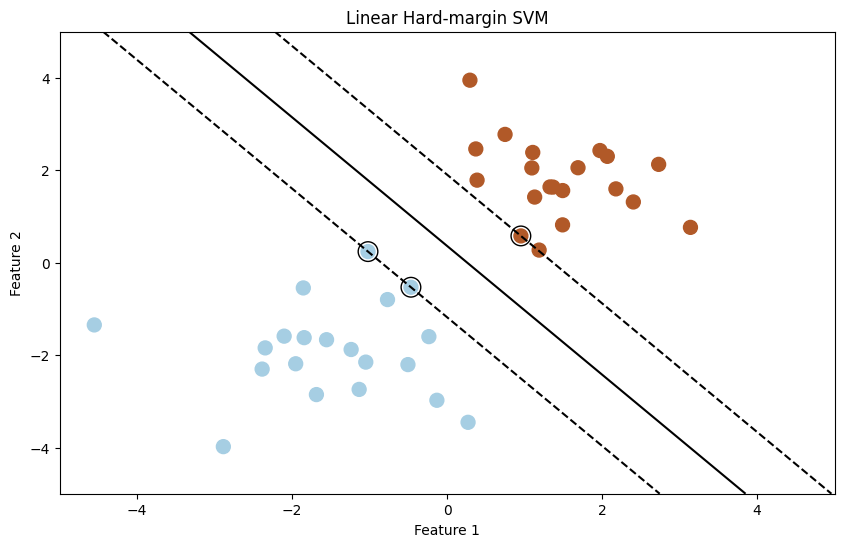

In [ ]:
# CS771 (Autumn 2023)
# Hard-margin SVM by solving the dual problem (which is a quadratic program \alpha^\top 1 - 0.5 \alpha^\top G \alpha)
# To solve the QP (a convex maximization problem), we use the cvxopt package
import numpy as np
import cvxopt
import cvxopt.solvers
import matplotlib.pyplot as plt

# Generate some synthetic data
np.random.seed(0)
X = np.vstack([np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]])
y = np.hstack([-np.ones(20), np.ones(20)])

# Number of data points
N = X.shape[0]

# Solve the minimization of the the objective [\alpha^\top q - 0.5 \alpha^\top G \alpha] w.r.t. \alpha
# Constraint 1: \alpha_i >= 0
# Constraint 2: \sum_{i=1}^N \alpha_i y_n = 0

# Gram matrix (each entry = y_i y_j x_i ^\top x_j)
Gtmp = np.dot(X, X.T) * np.outer(y, y)
G = cvxopt.matrix(Gtmp)
q = cvxopt.matrix(-np.ones(N))
# M and h specify constraint 1 on alpha
M = cvxopt.matrix(-np.eye(N))
h = cvxopt.matrix(np.zeros(N))
# A and d specify constraint 2 on alpha
A = cvxopt.matrix(y, (1, N))
d = cvxopt.matrix(0.0)

# Solve the quadratic programming problem
cvxopt.solvers.options['show_progress'] = False
solution = cvxopt.solvers.qp(G, q, M, h, A, d)

# Extract the Lagrange multipliers
alpha_optimal = np.array(solution['x']).flatten()

# Find the support vectors
support_vector_indices = np.where(alpha_optimal > 1e-5)[0]
support_vectors = X[support_vector_indices]
support_vector_labels = y[support_vector_indices]

# Calculate the weight vector w and bias b

# Extract the support vectors and their labels
support_vectors = X[support_vector_indices]
support_vector_labels = y[support_vector_indices]

# Compute the weight vector w
w = np.sum((alpha_optimal[support_vector_indices] * support_vector_labels).reshape(-1, 1) * support_vectors, axis=0)

b = np.mean(support_vector_labels - np.dot(support_vectors, w))

# Calculate the margin
margin = 1 / np.linalg.norm(w)

# Print the margin value
print("Margin:", margin)

# Print the coordinates of the support vectors and their labels
print("Support Vectors:")
for i in range(len(support_vector_indices)):
    idx = support_vector_indices[i]
    print("Support Vector {}: {}, Label = {}".format(i + 1, support_vectors[i], support_vector_labels[i]))


# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Hard-margin SVM')
plt.show()
